# Vergazov Artem
## Scientific Computing 2021: Homework Assignment 1

### Problem 1 (2 points)
Under assumptions of Amdahl's law, suppose that 75% of a program are perfectly parallelizable, and the rest is not parallelizable. 
1. What is the maximum speedup achievable by parallelization? 
2. Suppose that we have obtained speedup 2 (by using a suitable number of processes). What is the efficiency of this parallelization? 

### Solution
Let $s = 0.25$ - the fraction of work done sequentially, $1 - s = 0.75$ - parallelizable part. Let us suppose $P$ is the number of processors.

1. $\textrm{Speedup}(P) = {\textrm{Time}(1) \over \textrm{Time}(P)} = {\textrm{Time}(1) \over \textrm{Time}(1)(s + {(1 - s) \over P})} = {1 \over s + {1 - s \over P}} \leq {1 \over s} = 4 \textrm{ - max speedup}$

2. Suppose $\textrm{Speedup}(P) = 2$. Let us find $P$.

    $\textrm{Speedup}(P) = {1 \over s + {1 - s \over P}}$

    $\textrm{Speedup}(P) = {P \over P \cdot s + 1 - s}$

    $\textrm{Speedup}(P) \cdot (P \cdot s + 1 - s) = P$

    $P = {\textrm{Speedup}(P) \cdot (1 - s) \over 1 - \textrm{Speedup}(P) \cdot s} = {2 \cdot 0.75 \over 1 - 2 \cdot 0.25} = 3$
    
    Now, parallel efficiency
    
    $\textrm{Efficiency} = {\textrm{Speedup}(P) \over P} = {2 \over 3} = 67\%$

### Problem 4 (2 points)
Suppose that we want to distribute $N$ personal projects to $N$ students. Assume that each student $(k)_{k=0}^{N-1}$ has a list of his/her preferences for the projects, expressed as a vector $\mathbf r_k$ of integer ranks assigned to each project. Ranks vary between 0 and $N-1$ without repetitions, the **lower** the rank the **more preferable** the project. (For example, the first student's ranks are $\mathbf r_0 = [2,1,0]$, the second's $\mathbf r_1 = [0,2,1]$ and the third $\mathbf r_2 = [0,1,2]$). We want to distribute the projects so as to maximize the total preference, i.e., if $n_k$ denotes the project assigned to the $k$'th student, we want to make $f = \sum_{k=0}^{N-1} \mathbf r_k[n_k]$ as small as possible. (In the example above the optimal distribution is $n_0=2, n_1=0, n_2=1$, which gives $f=1$).  
  * Come up with an algorithm optimizing the distribution and implement it in a Python or C/C++ program. The algorithm should accept the preference vectors and output a recommended distribution $(n_k)_{k=1}^N$. The algorithm need not find the best solution, but is expected to generally produce better solutions than would have been obtained by randomly distributing the projects. The algorithm should be reasonably fast, say run in not more than a few seconds for $N=30$. 
  * Compare experimentally your algorithm with the trivial algorithm producing a random distribution. To this end, perform $M=1000$ experiments in each of which 1) random preference vectors for $N=30$ students and projects are generated; 2) the objective function $f$ is evaluated for both algorithms. After finishing all the experiments, plot the two respective distributions of the obtained $M$ values of $f$ and compute the mean values of $f$ for both algorithms. 

### Solution

Mean value of f for my algorithm: 63.261
Mean value of f for random algorithm: 435.289


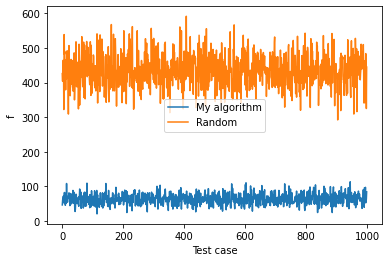

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def divideProjects(r):
    N = r.shape[0]
    n = np.zeros(N, dtype=int)
    projectsLeft = set(range(N))
    for student in range(N):
        for rankOfMostWanted in range(N):
            mostWantedProject = np.nonzero(r[student, :] == rankOfMostWanted)[0][0]
            if mostWantedProject in projectsLeft:
                n[student] = mostWantedProject
                projectsLeft.remove(mostWantedProject)
                break
    return n


def f(r, n):
    res = 0
    N = r.shape[0]
    for i in range(N):
        res += r[i, n[i]]
    return res


# Tests.
N = 30

# Students' ranks.
M = 1000
my_f = np.zeros(M)
random_f = np.zeros(M)

for testRun in range(M):
    r = np.zeros((N, N))
    for i in range(N):
        r[i, :] = np.random.permutation(N)
    
    myDistribution = divideProjects(r)
    randomDistribution = np.random.permutation(N)
    
    my_f[testRun] = f(r, myDistribution)
    random_f[testRun] = f(r, randomDistribution)
    
plt.plot(my_f, label='My algorithm')
plt.plot(random_f, label='Random')
plt.legend()
plt.xlabel('Test case')
plt.ylabel('f')

print(f'Mean value of f for my algorithm: {my_f.mean()}')
print(f'Mean value of f for random algorithm: {random_f.mean()}')

### Problem 5 (2 points)
Suppose that we have developed an algorithm that is supposed to generate independent (quasi-)random numbers uniformly distributed in the interval $[0,1]$. To test our algorithm, we perform a series of experiments. In each experiment, we generate $N=10^3$ numbers $(x_n)_{n=1}^N$ with our algorithm, and compute the minimum distance $r=\min_{1 \le n < m\le N}|x_n-x_m|$ between them. We observe that in more than 99% of such experiments we obtain $r < 10^{-5}$. Does this observation contradict the hypothesis of generating independent uniformly distributed random numbers? Explain your answer.

### Solution
This observation does not contradict anything. Supose the numbers were distributed uniformly - the minimum distance would be then around 1e-3. 